# AirBnB Berlin Price Prediction

## 0. Import modules

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
#
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split

import os

## 1. Preprocessing

### 1.1 Import des données

In [3]:
trainset = pd.read_csv(os.path.join('data/train_airbnb_berlin.csv'))
X_train = trainset.drop("Price", axis=1)
y_train = trainset["Price"]

### 1.2 Premières observations

In [5]:
pd.set_option('display.max_columns',40)
trainset.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
0,19665213.0,*,156079597.0,Maximilian,2016-01-20,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10437.0,DE,Germany,52.54652,13.41792,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,26.0
1,6436842.0,*,5302290.0,Dulie,2013-04-07,NaN,NaN,f,Pankow,Pankow,Berlin,13187.0,DE,Germany,52.56512,13.42214,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,NaN,2,7,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,f,41.0
2,10559468.0,*,59151456.0,Geank,2016-02-07,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10439.0,DE,Germany,52.54741,13.42521,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,NaN,1,1,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,50.0
3,27215482.0,*,193452785.0,Alix,2018-06-26,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245,DE,Germany,52.50958,13.45144,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,50.0
4,27287546.0,*,205870244.0,Lurina,2013-05-16,within a few hours,92%,t,Prenzlauer Berg,Pankow,Berlin,10405.0,DE,Germany,52.52995,13.41558,t,Apartment,Private room,3,1.0,1.0,2.0,NaN,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,55.0


In [9]:
trainset.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


<AxesSubplot:>

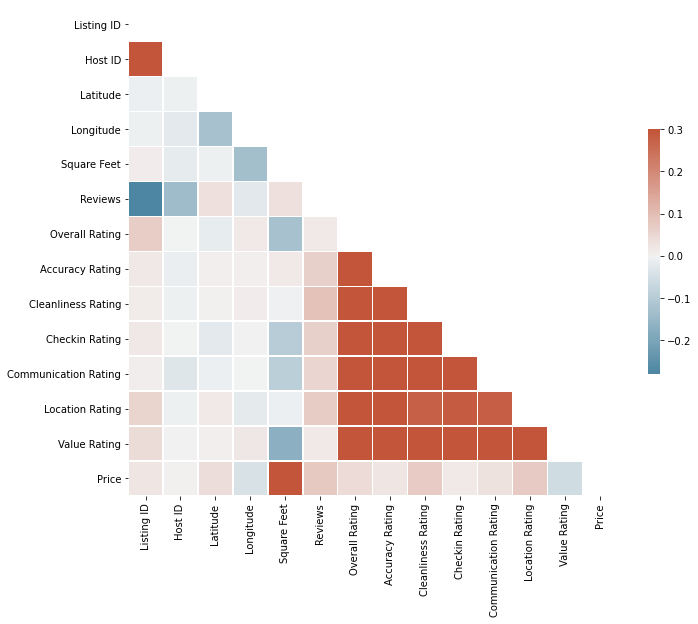

In [13]:
corr_matrix = trainset.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 1.3 Corrélation

La liste des features que je dois regarder est:  
<ol>
  <li>'Reviews'</li>
  <li>'First Review'</li>
  <li>'Last Review'</li>
  <li>'Overall Rating'</li>
  <li>'Accuracy Rating'</li>
  <li>'Cleanliness Rating'</li>
  <li>'Checkin Rating'</li>
  <li>'Communication Rating'</li>
  <li>'Location Rating'</li>
  <li>'Value Rating'</li>
</ol>

<AxesSubplot:>

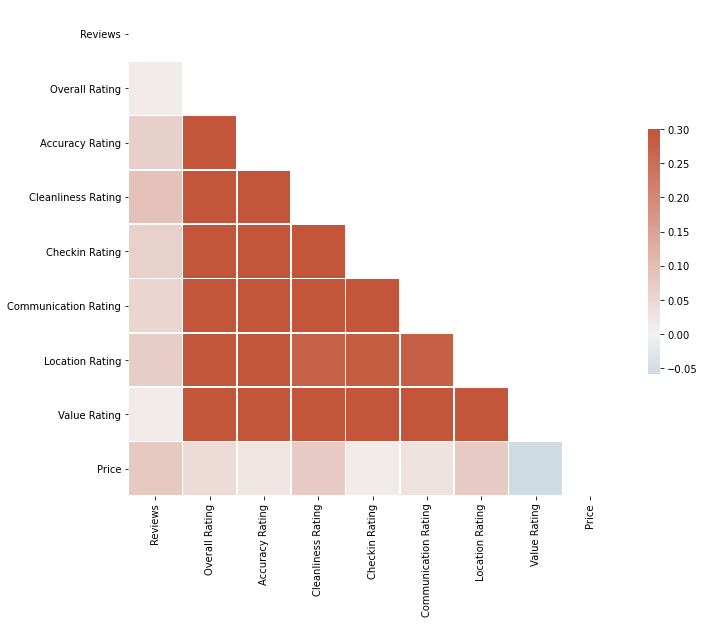

In [89]:
df=trainset[['Reviews','First Review','Last Review','Overall Rating','Accuracy Rating','Cleanliness Rating','Checkin Rating','Communication Rating','Location Rating','Value Rating','Price']]
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviews               15692 non-null  int64  
 1   First Review          12987 non-null  object 
 2   Last Review           12986 non-null  object 
 3   Overall Rating        12730 non-null  float64
 4   Accuracy Rating       12721 non-null  float64
 5   Cleanliness Rating    12722 non-null  float64
 6   Checkin Rating        12719 non-null  float64
 7   Communication Rating  12722 non-null  float64
 8   Location Rating       12721 non-null  float64
 9   Value Rating          12720 non-null  float64
 10  Price                 15683 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.3+ MB


In [55]:
df.head()

,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
0,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,26.0
1,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,41.0
2,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0
3,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,50.0
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0


In [91]:
from datetime import datetime
#dfmonth=pd.to_datetime(df['First Review']).dt.month
df1=pd.DataFrame(pd.to_datetime(df['First Review'].dropna()))
df['timestamp'] = df1[['First Review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df['day']=pd.to_datetime(df['First Review']).dt.day
df['month']=pd.to_datetime(df['First Review']).dt.month
df['year']=pd.to_datetime(df['First Review']).dt.year
df

/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_46056/3702702727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df1[['First Review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_46056/3702702727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=pd.to_datetime(df['First Review']).dt.day
/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_46056/3702702727.py:6: SettingWithCopyWarning: 
A v

,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price,timestamp,day,month,year
0,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,26.0,1.499386e+09,7.0,7.0,2017.0
1,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,41.0,1.432598e+09,26.0,5.0,2015.0
2,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0,1.461024e+09,19.0,4.0,2016.0
3,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,50.0,1.532995e+09,31.0,7.0,2018.0
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,11,2016-09-15,2019-01-02,98.0,10.0,9.0,10.0,10.0,10.0,10.0,45.0,1.473898e+09,15.0,9.0,2016.0
15688,4,2016-04-15,2016-07-31,100.0,10.0,9.0,10.0,10.0,10.0,9.0,130.0,1.460678e+09,15.0,4.0,2016.0
15689,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN
15690,6,2016-04-07,2018-08-07,90.0,10.0,10.0,10.0,10.0,10.0,9.0,100.0,1.459987e+09,7.0,4.0,2016.0


<AxesSubplot:>

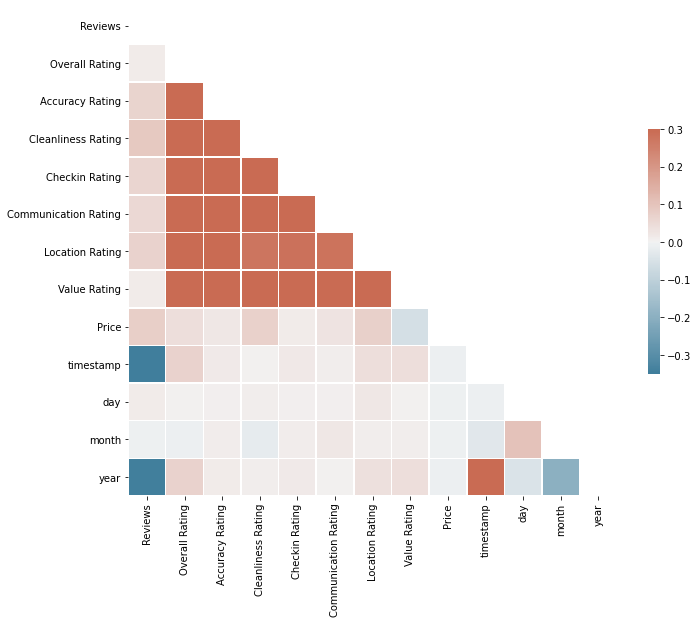

In [92]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})